> # Heart Attack Prediction

>1. *Importing modules*

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
import warnings

In [236]:
warnings.filterwarnings('ignore')

>2. *Fetching data*

In [237]:
df = pd.read_excel('data.xlsx')

In [238]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


>3. *Checking data*

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [240]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


>4. *Plotting the graphs*

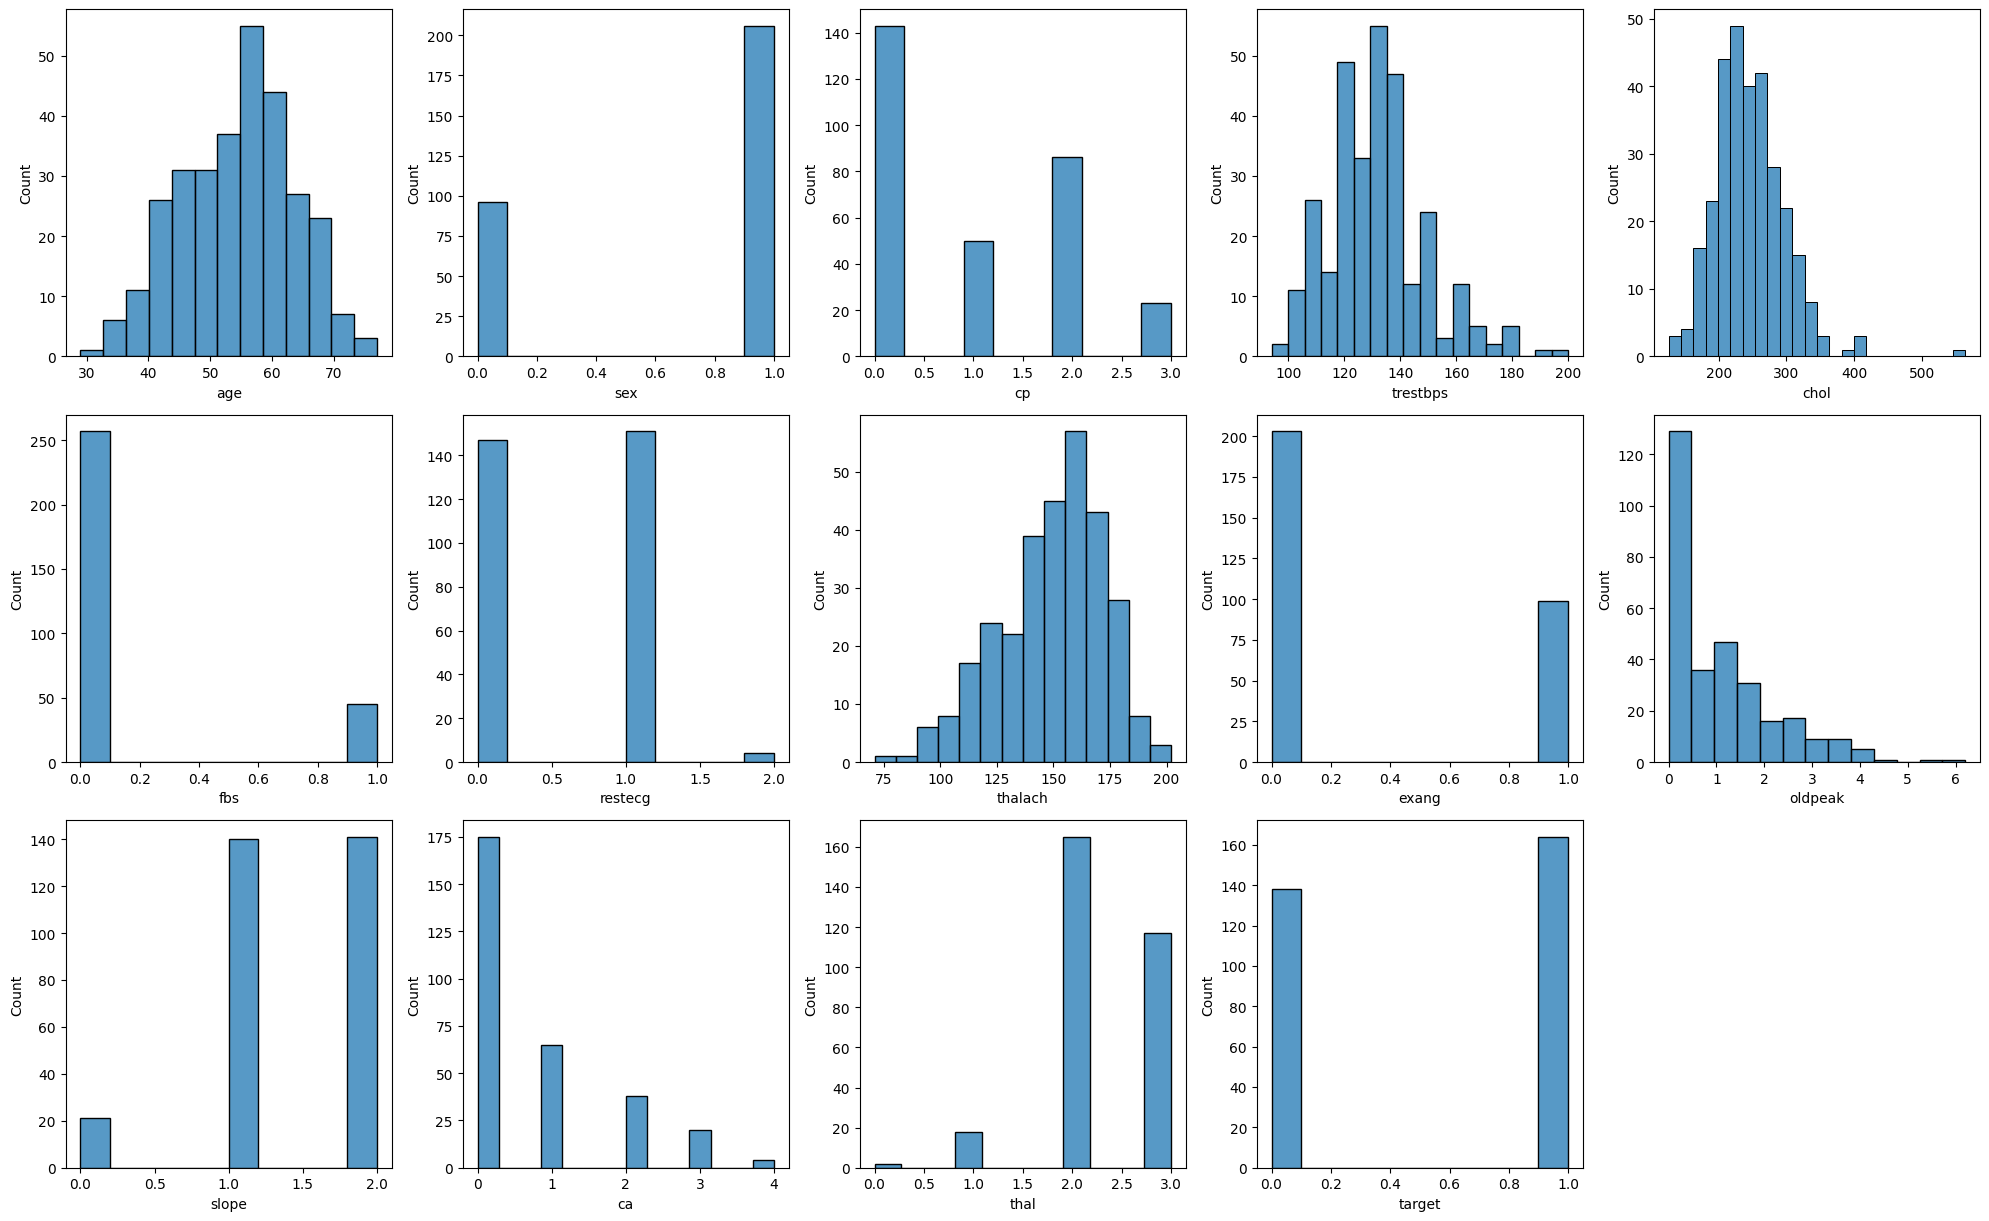

In [241]:
plt.figure(figsize=(20,20))
i=1
for col in df.columns:
    ax = plt.subplot(5,5,i)
    sns.histplot(df[col])
    plt.xlabel(col)
    i+=1
plt.tight_layout()
plt.show()

> 5. *Creating Heatmap of the correlation matrix of the dataset*

In [242]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

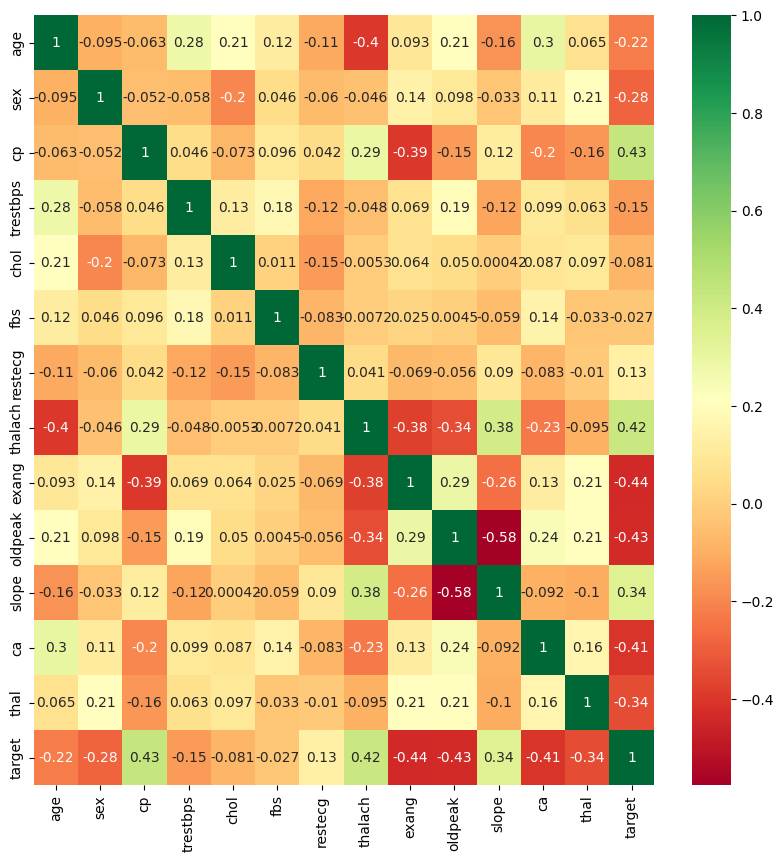

In [243]:
corr=df.corr()
top_corr_features = corr.index
plt.figure(figsize=(10,10))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

<Axes: >

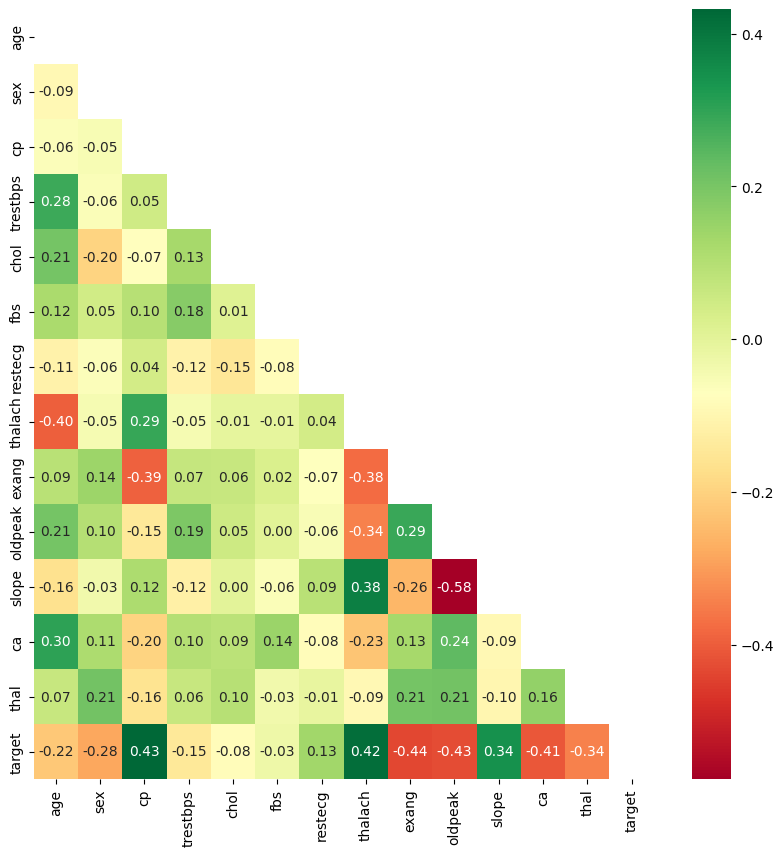

In [244]:
corr=df.corr()
top_corr_features = corr.index
plt.figure(figsize=(10,10))
mask= np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(df[top_corr_features].corr(),mask=mask,annot=True,cmap='RdYlGn',fmt='.2f')

> 6. *Defining Dependent and Target Variable*

In [245]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [246]:
X = df.drop('target',axis=1)
Y = df['target']

In [247]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [248]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [249]:
algo_list=[]
training_accuracy_list=[]
testing_accuracy_list=[]

> 7. *Train Test Split*

In [250]:
from sklearn.model_selection import train_test_split

In [251]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [252]:
X_train.shape

(241, 13)

In [253]:
X_test.shape

(61, 13)

In [254]:
Y_train.shape

(241,)

In [255]:
Y_test.shape

(61,)

> 8. *Standard Scaling*

In [256]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)


> 9. *Applying KNN Algo*

In [257]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn,X_train,Y_train,cv=10)
    knn_scores.append(score.mean())


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

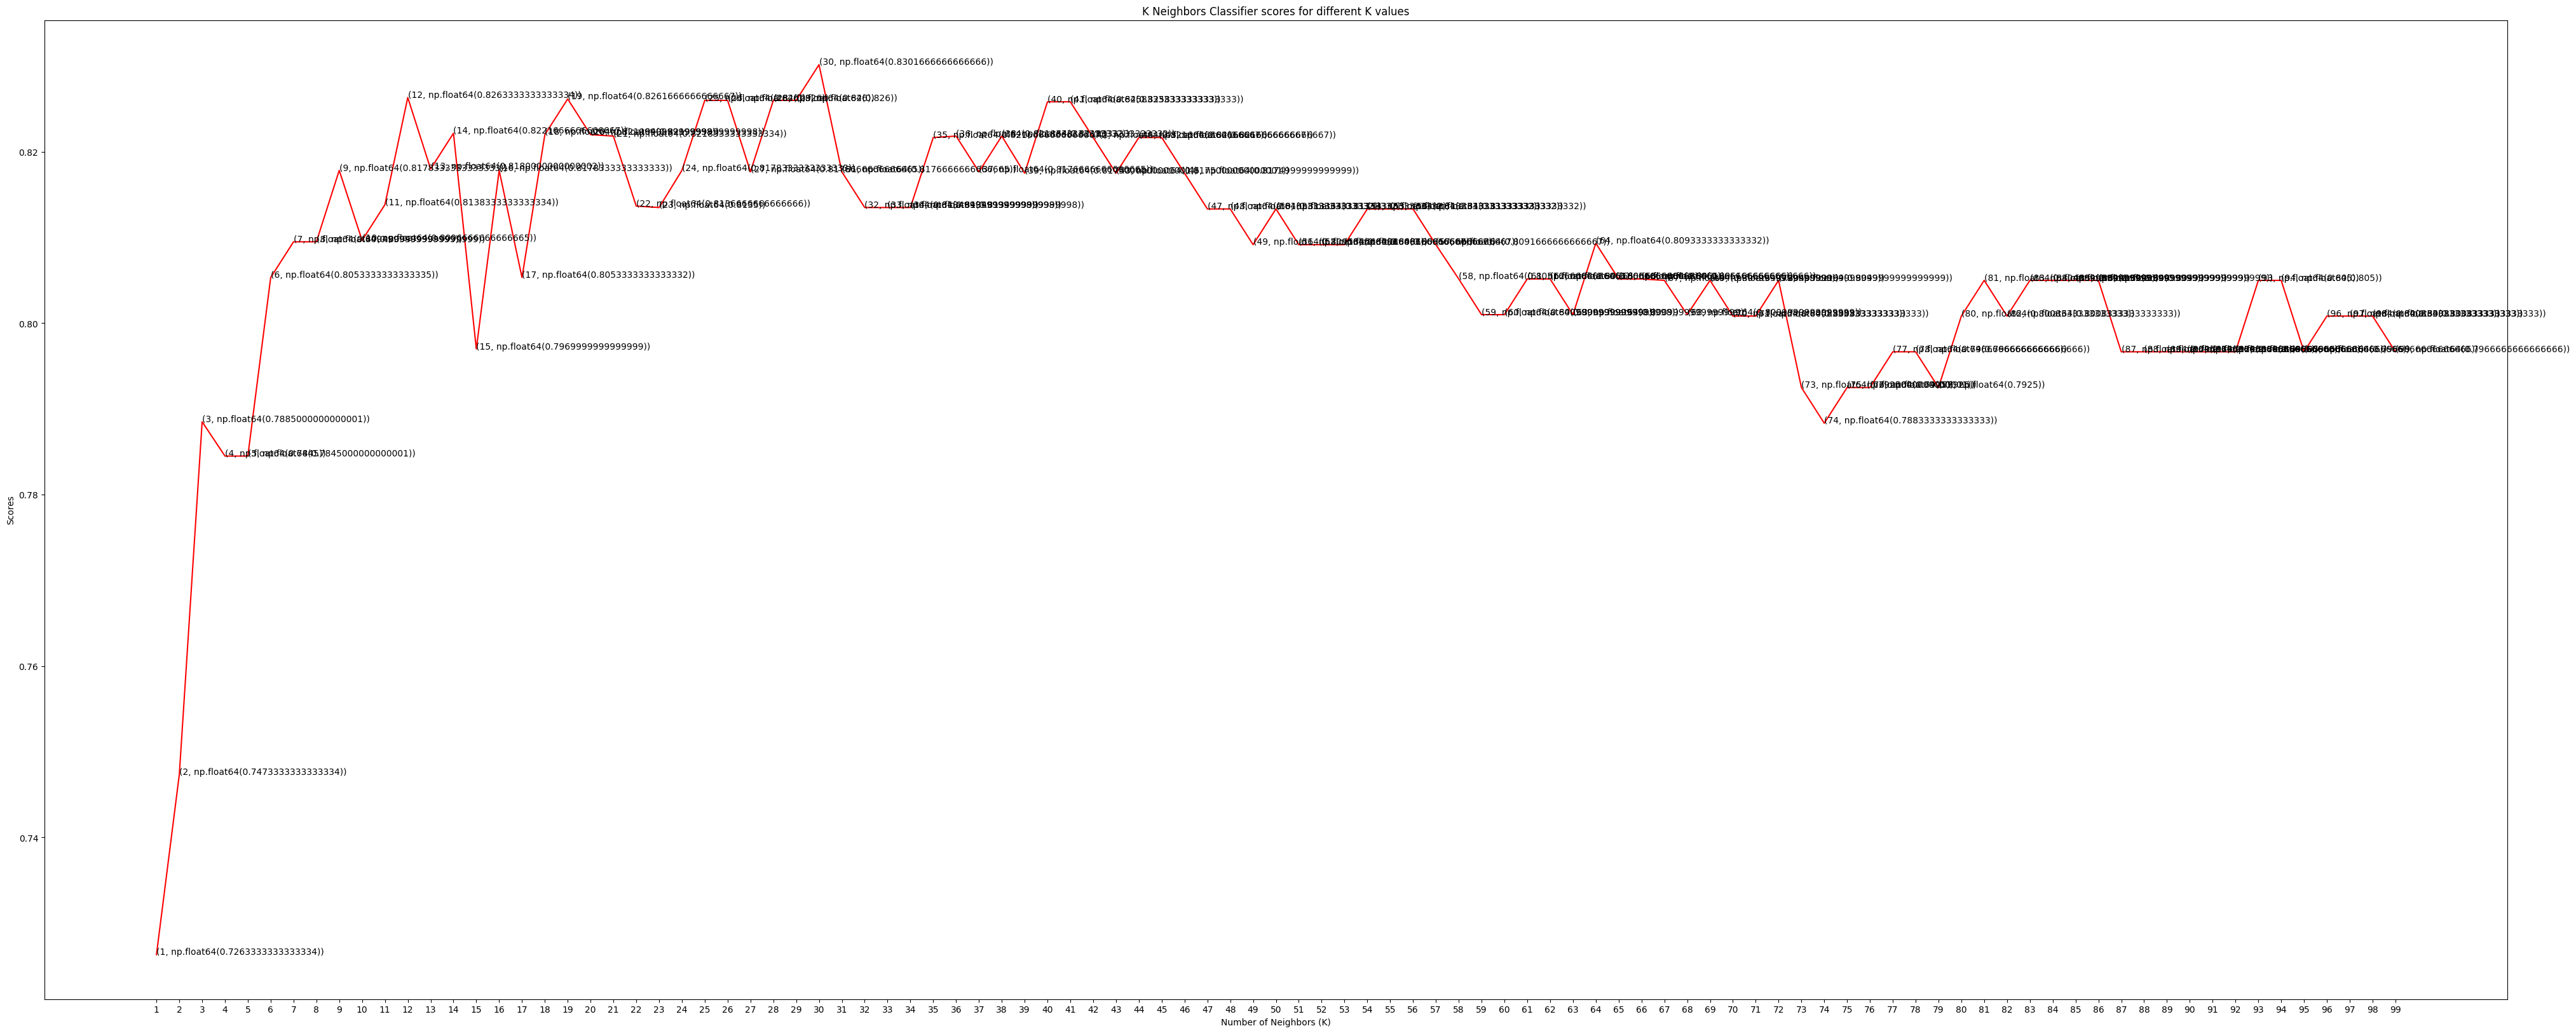

In [258]:
plt.figure(figsize=(50,20))
plt.plot([k for k in range(1, 100)], knn_scores, color = 'red')
for i in range(1,100):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 100)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [259]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=30)

In [260]:
print(f'Accuracy Score using KNN Algorithm : {100*round(accuracy_score(Y_test,knn.predict(X_test)),4)} %')

Accuracy Score using KNN Algorithm : 88.52 %


In [261]:

knn_train_Accuracy = 100*round(accuracy_score(Y_train,knn.predict(X_train)),4)
training_accuracy_list.append(knn_train_Accuracy)
knn_test_Accuracy = 100*round(accuracy_score(Y_test,knn.predict(X_test)),4)
testing_accuracy_list.append(knn_test_Accuracy)


In [262]:
algo_list.append('KNN')

In [263]:
print(f'Algo: KNN ')
print('\n------------------------------------------------------------------\n')
print(f'Training data accuracy score: {100*round(accuracy_score(Y_train,knn.predict(X_train)),4)} % \n')
print(f'Training data Confusion Matrix: \n {confusion_matrix(Y_train,knn.predict(X_train))}\n')
print(f'Training data Classification Report:\n {classification_report(Y_train,knn.predict(X_train))}')
print('\n------------------------------------------------------------------\n')
print(f'Testing data accuracy score: {100*round(accuracy_score(Y_test,knn.predict(X_test)),4)} % \n')
print(f'Testing data Confusion Matrix: \n {confusion_matrix(Y_test,knn.predict(X_test))}\n')

print(f'Testing data Classification Report:\n {classification_report(Y_test,knn.predict(X_test))}')

Algo: KNN 

------------------------------------------------------------------

Training data accuracy score: 82.57 % 

Training data Confusion Matrix: 
 [[ 80  31]
 [ 11 119]]

Training data Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79       111
           1       0.79      0.92      0.85       130

    accuracy                           0.83       241
   macro avg       0.84      0.82      0.82       241
weighted avg       0.83      0.83      0.82       241


------------------------------------------------------------------

Testing data accuracy score: 88.52 % 

Testing data Confusion Matrix: 
 [[22  5]
 [ 2 32]]

Testing data Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.

In [264]:
pickle.dump(knn,open("KNN","wb"))

> 10. *Decision Tree Classifier*

In [265]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

params = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

grid_search_dtc = GridSearchCV(dtc,params,cv=5,n_jobs=-1,verbose=1)
grid_search_dtc.fit(X_train,Y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [266]:
grid_search_dtc.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'splitter': 'random'}

In [267]:
grid_search_dtc.best_score_

np.float64(0.8465986394557822)

In [268]:
dtc = DecisionTreeClassifier(criterion= 'gini',
max_depth= 21,
min_samples_leaf= 9,
min_samples_split= 6,
splitter= 'random')

In [269]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=21, min_samples_leaf=9, min_samples_split=6,
                       splitter='random')

In [270]:
print(f'Accuracy Score using DecisionTreeClassifier Algorithm : {100*round(accuracy_score(Y_test,dtc.predict(X_test)),4)} %')

Accuracy Score using DecisionTreeClassifier Algorithm : 81.97 %


In [271]:
algo_list.append('DecisionTreeClassifier')

In [272]:
dtc_train_Accuracy = 100*round(accuracy_score(Y_train,dtc.predict(X_train)),4)
training_accuracy_list.append(dtc_train_Accuracy)
knn_test_Accuracy = 100*round(accuracy_score(Y_test,dtc.predict(X_test)),4)
testing_accuracy_list.append(knn_test_Accuracy)

In [273]:
pickle.dump(dtc,open("DecisionTreeClassifier","wb"))

In [274]:
print(f'Algo: DecisionTreeClassifier ')
print('\n------------------------------------------------------------------\n')
print(f'Training data accuracy score: {100*round(accuracy_score(Y_train,dtc.predict(X_train)),4)} % \n')
print(f'Training data Confusion Matrix: \n {confusion_matrix(Y_train,dtc.predict(X_train))}\n')
print(f'Training data Classification Report:\n {classification_report(Y_train,dtc.predict(X_train))}')
print('\n------------------------------------------------------------------\n')
print(f'Testing data accuracy score: {100*round(accuracy_score(Y_test,dtc.predict(X_test)),4)} % \n')
print(f'Testing data Confusion Matrix: \n {confusion_matrix(Y_test,dtc.predict(X_test))}\n')

print(f'Testing data Classification Report:\n {classification_report(Y_test,dtc.predict(X_test))}')

Algo: DecisionTreeClassifier 

------------------------------------------------------------------

Training data accuracy score: 83.39999999999999 % 

Training data Confusion Matrix: 
 [[ 86  25]
 [ 15 115]]

Training data Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81       111
           1       0.82      0.88      0.85       130

    accuracy                           0.83       241
   macro avg       0.84      0.83      0.83       241
weighted avg       0.84      0.83      0.83       241


------------------------------------------------------------------

Testing data accuracy score: 81.97 % 

Testing data Confusion Matrix: 
 [[23  4]
 [ 7 27]]

Testing data Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro a

> 11. *Applying RandomForest Classification*

In [275]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
params = {
     'n_estimators': range(100,2001,50),        
}
grid_search_rfc = GridSearchCV(estimator = rfc, param_grid = params,cv = 2, scoring = 'accuracy', verbose = 1 , n_jobs = -1 )
grid_search_rfc.fit(X_train, Y_train)

Fitting 2 folds for each of 39 candidates, totalling 78 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': range(100, 2001, 50)},
             scoring='accuracy', verbose=1)

In [276]:
algo_list.append('RandomForestClassifier')

In [277]:
grid_search_rfc.best_params_['n_estimators']

350

In [278]:
grid_search_rfc.best_score_

np.float64(0.8464531680440772)

In [279]:
rfc = RandomForestClassifier(n_estimators=grid_search_rfc.best_params_['n_estimators'],random_state=42)
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=350, random_state=42)

In [280]:
print(f'Accuracy Score using RandomForestClassifier Algorithm : {100*round(accuracy_score(Y_test,rfc.predict(X_test)),4)} %')

Accuracy Score using RandomForestClassifier Algorithm : 86.89 %


In [281]:
rfc_train_Accuracy = 100*round(accuracy_score(Y_train,rfc.predict(X_train)),4)
training_accuracy_list.append(rfc_train_Accuracy)
rfc_test_Accuracy = 100*round(accuracy_score(Y_test,rfc.predict(X_test)),4)
testing_accuracy_list.append(rfc_test_Accuracy)

In [282]:
pickle.dump(rfc,open("RandomForest",'wb'))

In [283]:
print(f'Algo: RandomForestClassifier ')
print('\n------------------------------------------------------------------\n')
print(f'Training data accuracy score: {100*round(accuracy_score(Y_train,rfc.predict(X_train)),4)} % \n')
print(f'Training data Confusion Matrix: \n {confusion_matrix(Y_train,rfc.predict(X_train))}\n')
print(f'Training data Classification Report:\n {classification_report(Y_train,rfc.predict(X_train))}')
print('\n------------------------------------------------------------------\n')
print(f'Testing data accuracy score: {100*round(accuracy_score(Y_test,rfc.predict(X_test)),4)} % \n')
print(f'Testing data Confusion Matrix: \n {confusion_matrix(Y_test,rfc.predict(X_test))}\n')

print(f'Testing data Classification Report:\n {classification_report(Y_test,rfc.predict(X_test))}')

Algo: RandomForestClassifier 

------------------------------------------------------------------

Training data accuracy score: 100.0 % 

Training data Confusion Matrix: 
 [[111   0]
 [  0 130]]

Training data Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       130

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241


------------------------------------------------------------------

Testing data accuracy score: 86.89 % 

Testing data Confusion Matrix: 
 [[24  3]
 [ 5 29]]

Testing data Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.8

In [284]:
models =pd.DataFrame( {
    'Model':algo_list,
    'Training_Score in Percentage':training_accuracy_list,
    'Testing_Score in Percentage':testing_accuracy_list
    
})

In [285]:
models

,Model,Training_Score in Percentage,Testing_Score in Percentage
0,KNN,82.57,88.52
1,DecisionTreeClassifier,83.40,81.97
2,RandomForestClassifier,100.00,86.89


In [288]:
models.sort_values(by='Training_Score in Percentage',ascending=True)

,Model,Training_Score in Percentage,Testing_Score in Percentage
0,KNN,82.57,88.52
1,DecisionTreeClassifier,83.40,81.97
2,RandomForestClassifier,100.00,86.89


In [314]:
l_train = models['Training_Score in Percentage'].tolist()

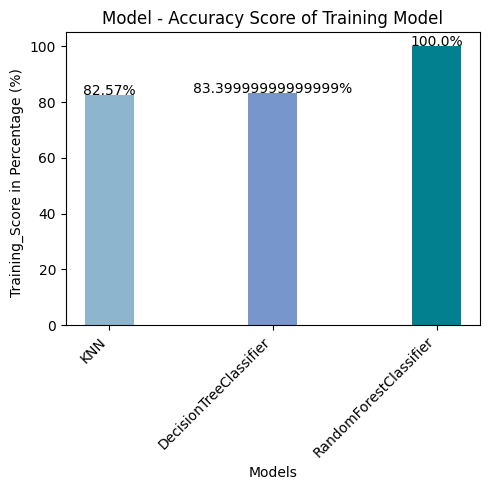

In [316]:
plt.figure(figsize=(5,5))
plt.bar(models['Model'],models['Training_Score in Percentage'],0.3,color=['#8eb5ce','#7796cb','#028090'])
for i in range(len(l_train)):
    plt.text(i, l_train[i], f'{l_train[i]}%', ha = 'center')
plt.title('Model - Accuracy Score of Training Model')
plt.xlabel('Models')
plt.ylabel('Training_Score in Percentage (%)  ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [301]:
l=models['Testing_Score in Percentage'].tolist()

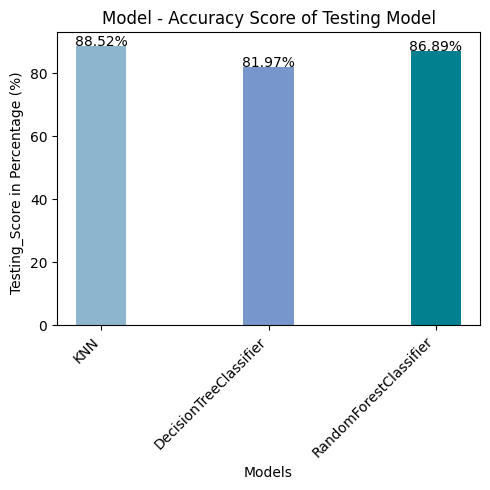

In [313]:
plt.figure(figsize=(5,5))
plt.bar(models['Model'],models['Testing_Score in Percentage'],0.3,color=['#8eb5ce','#7796cb','#028090'])
for i in range(len(l)):
    plt.text(i, l[i], f'{l[i]}%', ha = 'center')
plt.title('Model - Accuracy Score of Testing Model')
plt.xlabel('Models')
plt.ylabel('Testing_Score in Percentage (%)  ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()